In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import json
import matplotlib.pyplot as plt

En este trabajo podremos observar las ventas de un supermercado, analizaremos todas las caracteristicas de los productos tales como la linea del producto, el genero y su precio unitario. Tamnien podremos ver como se distribuyen las ventas de acuerdo a la ciudad o al tipo de cliente, dandonos asi un registro para saber como se mueven los prductos en dicho supermercado.

In [2]:
BasedD = pd.read_csv ("C:/Users/franc/Downloads/datasets_712498_1241968_supermarket_sales.csv")
BasedD.head(10)

,Unnamed: 0,Invoice ID,Branch,City,Customer_type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


Aqui vemos los tipos de las variables que se utilizan

In [3]:
BasedD.dtypes

Unnamed: 0                   int64
Invoice ID                  object
Branch                      object
City                        object
Customer_type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

En esta seccion lo que se hizo fue renombrar las columnas para un mayor entendimiento del programador y del lector

In [4]:
header_names=['ID de factura','Rama','Ciudad','Tipo de cliente','Genero','Linea de producto','Precio unitario','Cantidad','Impuesto 5%','Total','Fecha','Hora','Pago','Cogs','Porcentaje de margen bruto','Ingresos brutos','Clasificacion']
BasedD = pd.read_csv ("C:/Users/franc/Downloads/datasets_712498_1241968_supermarket_sales.csv",header=None,skiprows=1,names=header_names)
BasedD.head(10)

,ID de factura,Rama,Ciudad,Tipo de cliente,Genero,Linea de producto,Precio unitario,Cantidad,Impuesto 5%,Total,Fecha,Hora,Pago,Cogs,Porcentaje de margen bruto,Ingresos brutos,Clasificacion
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


Aqui observamos la informacion de las columnas 

In [25]:
BasedD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID de factura               1000 non-null   object 
 1   Rama                        1000 non-null   object 
 2   Ciudad                      1000 non-null   object 
 3   Tipo de cliente             1000 non-null   object 
 4   Genero                      1000 non-null   object 
 5   Linea de producto           1000 non-null   object 
 6   Precio unitario             1000 non-null   float64
 7   Cantidad                    1000 non-null   int64  
 8   Impuesto 5%                 1000 non-null   float64
 9   Total                       1000 non-null   float64
 10  Fecha                       1000 non-null   object 
 11  Hora                        1000 non-null   object 
 12  Pago                        1000 non-null   object 
 13  Cogs                        1000 n

OBJETIVO

El onjetivo de este trabajo es conocer que productos son mas vendidos y cual es la sucursal que mas vende.
Otro objetivo que escogimos fue hacer un analisis para saber en que fecha y en que horarios estan mas concurridos los distintos supermercados.

DESARROLLO

En este caso una de las columnas seleccionadas fue la de cantidad de producto que se mas se vende en el supermercado para asi saber que productos seguir surtiendo y cuales son los productos que son de poco agrado para los clientes.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

En esta seccion podemos ver la cantidad de articulos vendidos de cada producto, la cantidad de articulos vendidos por ciudad y el total de ganancias.

In [37]:
print(BasedD.groupby('Quantity').size())

Quantity
1     112
2      91
3      90
4     109
5     102
6      98
7     102
8      85
9      92
10    119
dtype: int64


In [54]:
print(BasedD.groupby('City').size())

City
Mandalay     332
Naypyitaw    328
Yangon       340
dtype: int64


Aqui podemos ver graficamente nuestros datos para tener una idea de la dispersion de los mismos.

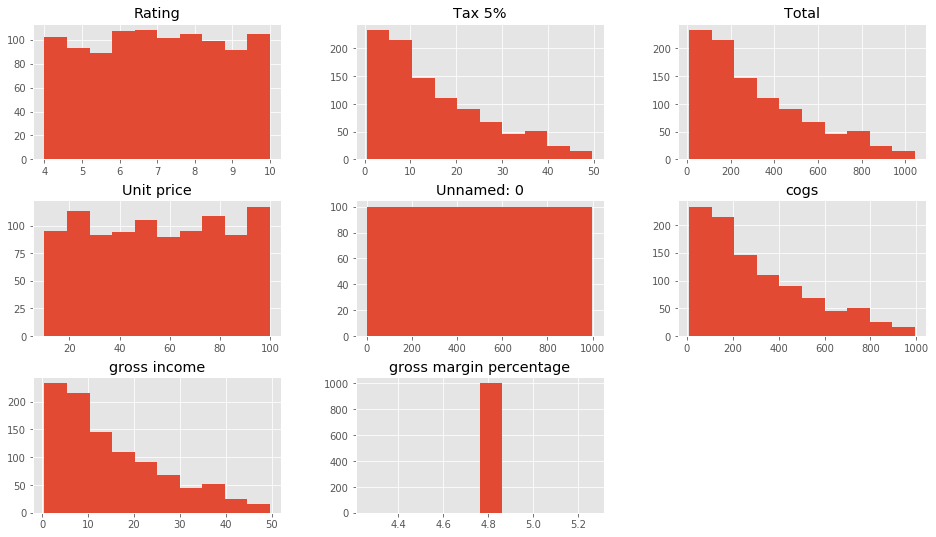

In [40]:
BasedD.drop(['Quantity'],1).hist()
plt.show()

En este caso seleccionamos 3 dimensiones: Precio unitario, Tax, Total y las cruzamos para ver si nos dan alguna pista de su agrupación y la relación con la cantidad.

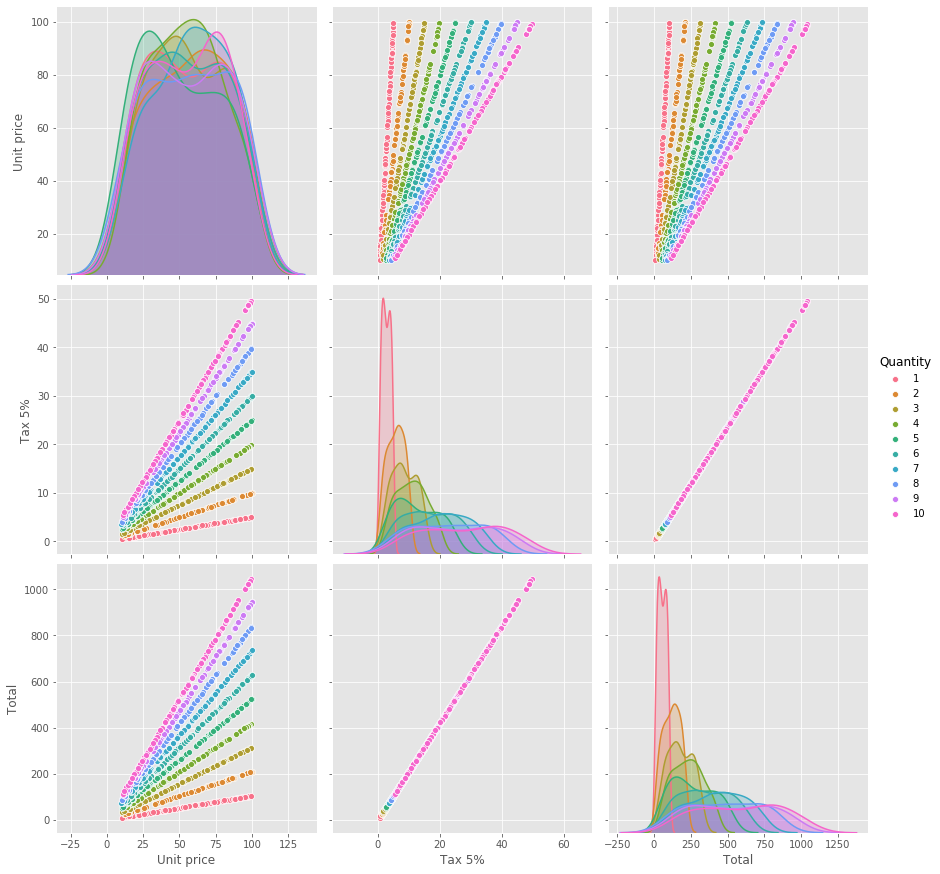

In [42]:
sb.pairplot(BasedD.dropna(), hue='Quantity',size=4,vars=["Unit price","Tax 5%","Total"],kind='scatter')

In [ ]:
Concretamos la estructura de datos que utilizaremos para alimentar el algoritmo. 
Como se ve, sólo cargamos las columnas Unit price, Tax 5% y Total en nuestra variable X.

In [44]:
X = np.array(BasedD[["Unit price","Tax 5%","Total"]])
y = np.array(BasedD['Quantity'])
X.shape

(1000, 3)

In [ ]:
Ahora veremos una gráfica en 3D con 9 colores representando las cantidades.

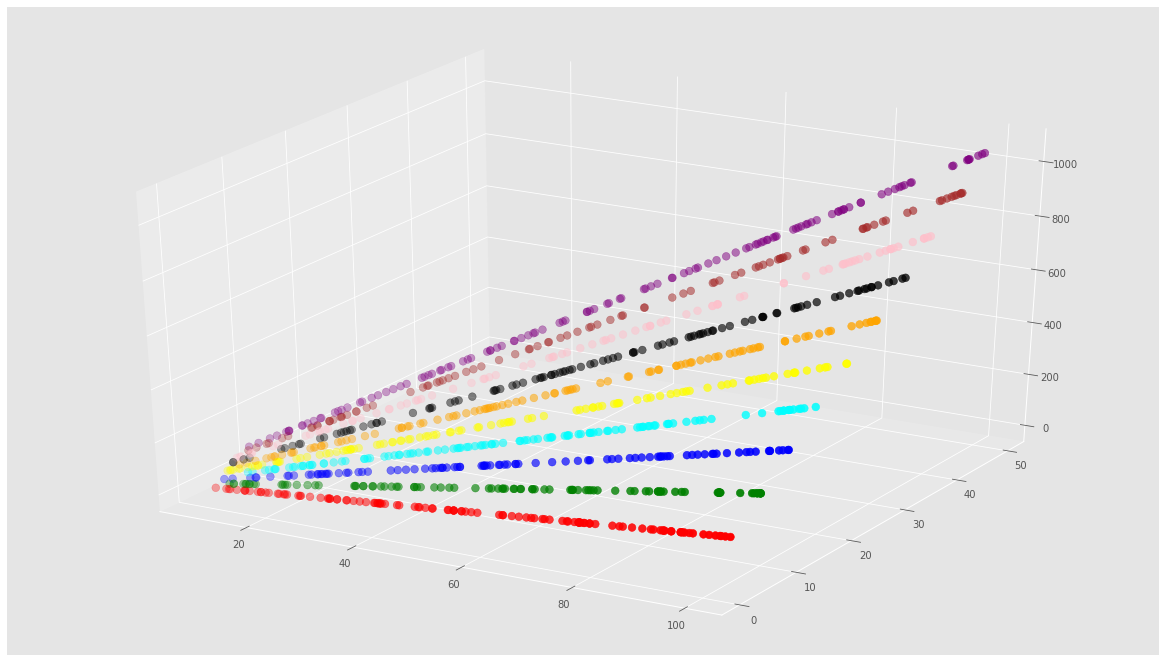

In [46]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

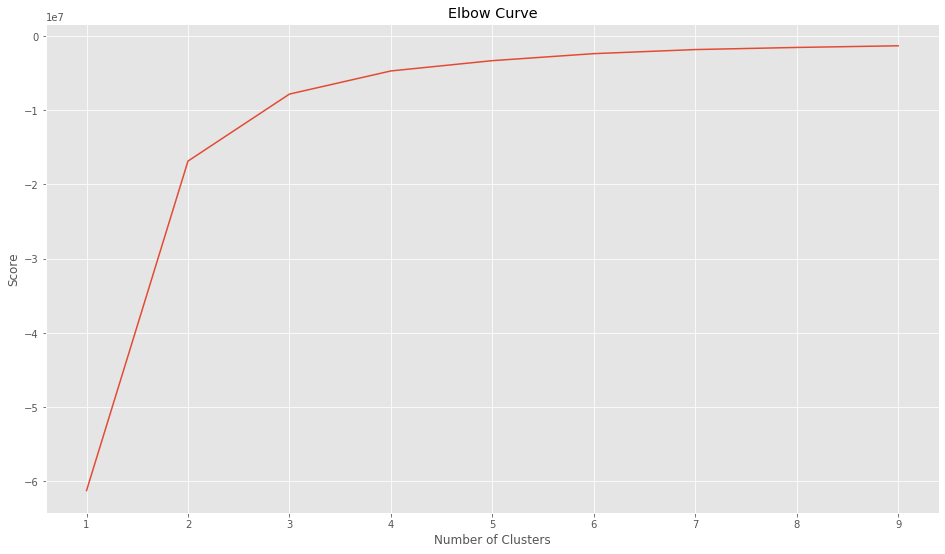

In [52]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
En esta seccion se realizo un clustering, para asi formar 3 clusters, el numero 3 salio de la grafica anterior donde podemos observar el codo de la curva por lo que se eligio esa cantidad de clusters 

In [53]:
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 41.6769186    6.27866279 131.8519186 ]
 [ 63.2099361   19.07626038 400.60146805]
 [ 84.10602339  36.07432456 757.56081579]]


In [ ]:
CONCLUSION

Como conclusion de este trabajo podemos darnos cuentas cual es el producto mas vendido y cual es la sucursall que mas vende, que en este caso es la sucursal ubicada en Yangon, aunque no es mucha la diferencia entre las 3 ya que las3 sucursales venden casi lo mismo.